# Data Casal Montserratina

In [1]:
#Data Manipulation

import pandas as pd
import numpy as np
from datetime import timedelta

import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# for EDA
from ydata_profiling import ProfileReport 

#Others
import holidays

#Parameters Dict
parameters = {
    "paths": {
        "2022_01_06": "../data/data_casal_montserratina/Casal_Montserratina_202201_202206.csv",
        "2022_07_12": "../data/data_casal_montserratina/Casal_Montserratina_202207_202212.csv",
        "2023_01_06": "../data/data_casal_montserratina/Casal_Montserratina_202301_202306.csv",
        "2023_07_12": "../data/data_casal_montserratina/Casal_Montserratina_202307_202312.csv",
        "2024_01_05": "../data/data_casal_montserratina/Casal_Montserratina_202401_202405.csv",
    }
}

In [2]:
ruta_data = "../data/data_casal_montserratina/"

In [3]:
df1 = pd.read_csv(parameters["paths"]["2022_01_06"], delimiter=";")
df2 = pd.read_csv(parameters["paths"]["2022_07_12"], delimiter=";")
df3 = pd.read_csv(parameters["paths"]["2023_01_06"], delimiter=";")
df4 = pd.read_csv(parameters["paths"]["2023_07_12"], delimiter=";")
df5 = pd.read_csv(parameters["paths"]["2024_01_05"], delimiter=";")

In [4]:
# hago un concat de los 4 datasets, para Unir los DataFrames uno a continuación del otro
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [5]:
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"], format="%d/%m/%Y %H:%M")
df.rename(columns={'TimeStamp': 'Date'}, inplace=True)
df.rename(columns={'Valor': 'Consumo'}, inplace=True)
df.rename(columns={'Període tarifari': 'Periode_tarifari'}, inplace=True)
df.rename(columns={'Tipus lectura': 'Tipus_lectura'}, inplace=True)

In [6]:
df

Date  Consumo  Periode_tarifari Tipus_lectura
0     2022-01-01 00:00:00        6                 6          Real
1     2022-01-01 01:00:00        6                 6          Real
2     2022-01-01 02:00:00        5                 6          Real
3     2022-01-01 03:00:00        7                 6          Real
4     2022-01-01 04:00:00        7                 6          Real
...                   ...      ...               ...           ...
17683 2024-05-07 19:00:00       10                 4          Real
17684 2024-05-07 20:00:00        7                 4          Real
17685 2024-05-07 21:00:00        4                 4          Real
17686 2024-05-07 22:00:00        2                 5          Real
17687 2024-05-07 23:00:00        2                 5          Real

[17688 rows x 4 columns]

## EDA

In [7]:
# Generate the report
profile = ProfileReport(df,title="monserratina_2022_2023", tsmode=True, sortby="Date", correlations={"auto": {"calculate": False}})

# Save the report to .html
# profile.to_file("monserratina_2022_2023.html")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# Elimino la columna "Tipo de Lectura" & "Periode Tarifari"
df = df.drop(columns=["Tipus_lectura", "Periode_tarifari"])

# Missing values

In [9]:
#Prints the NaN Values per Column of a dataset
def checkNaNValues(df):
    return print(f"NaN Count per Column", df.isna().any(axis=1).sum())

#Checks if there is any missing time series
def checkMissingData(df, date_column):
    min_date = df[date_column].min()
    max_date = df[date_column].max()

    date_range = pd.date_range(start=min_date, end=max_date, freq='h')
    missing_dates = date_range[~date_range.isin(df[date_column])]
    print(f"Number of Missing Values: {missing_dates.shape[0]}")
    return None if missing_dates.shape[0] == 0 else missing_dates, date_range

In [10]:
checkNaNValues(df)
missing_dates, date_range = checkMissingData(df, 'Date')

NaN Count per Column 0
Number of Missing Values: 2906


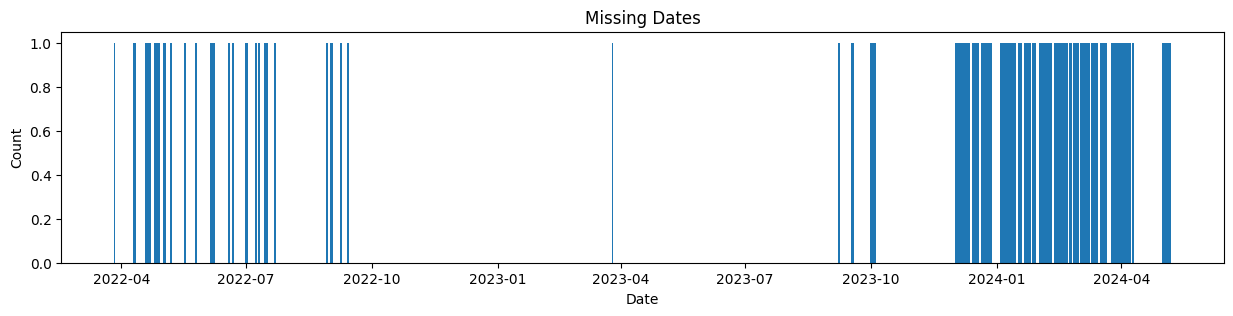

In [11]:
plt.figure(figsize=(15, 3))
plt.bar(missing_dates, [1] * len(missing_dates))
plt.title("Missing Dates")
plt.xlabel("Date")
plt.ylabel("Count")
# plt.xticks(rotation=0)
plt.show()

In [12]:
# para ver un trozo de las fechas faltantes.

print(df[(df["Date"]>"2022-04-09 22:00:00") & (df["Date"]<"2022-04-11 01:00:00")])

# >>>>> notar que entre las 23 del 9/4 a las 00 del 11/4 no hay datos. 

                    Date  Consumo
2374 2022-04-09 23:00:00        2
2375 2022-04-11 00:00:00        2


### rellenar los huecos de Date

In [13]:
new_df = df.drop_duplicates(keep=False) # 
#new_df

In [14]:
new_df.set_index("Date", inplace=True)
#new_df

In [15]:
# Reindexa el DataFrame con el nuevo rango de fechas y rellena los valores faltantes con NaN
data_reindexed = new_df.reindex(date_range)
#data_reindexed

In [16]:
data_reindexed.reset_index(inplace=True)
data_reindexed.rename(columns={'index': 'Date'}, inplace=True)

In [17]:
data_reindexed

Date  Consumo
0     2022-01-01 00:00:00      6.0
1     2022-01-01 01:00:00      6.0
2     2022-01-01 02:00:00      5.0
3     2022-01-01 03:00:00      7.0
4     2022-01-01 04:00:00      7.0
...                   ...      ...
20587 2024-05-07 19:00:00     10.0
20588 2024-05-07 20:00:00      7.0
20589 2024-05-07 21:00:00      4.0
20590 2024-05-07 22:00:00      2.0
20591 2024-05-07 23:00:00      2.0

[20592 rows x 2 columns]

Notar que ahora aparecen rellenas!... con Nulls, tiny bam! 

In [18]:
print(data_reindexed[(data_reindexed["Date"]>"2022-04-09 22:00:00") & (data_reindexed["Date"]<"2022-04-11 01:00:00")])

                    Date  Consumo
2375 2022-04-09 23:00:00      2.0
2376 2022-04-10 00:00:00      NaN
2377 2022-04-10 01:00:00      NaN
2378 2022-04-10 02:00:00      NaN
2379 2022-04-10 03:00:00      NaN
2380 2022-04-10 04:00:00      NaN
2381 2022-04-10 05:00:00      NaN
2382 2022-04-10 06:00:00      NaN
2383 2022-04-10 07:00:00      NaN
2384 2022-04-10 08:00:00      NaN
2385 2022-04-10 09:00:00      NaN
2386 2022-04-10 10:00:00      NaN
2387 2022-04-10 11:00:00      NaN
2388 2022-04-10 12:00:00      NaN
2389 2022-04-10 13:00:00      NaN
2390 2022-04-10 14:00:00      NaN
2391 2022-04-10 15:00:00      NaN
2392 2022-04-10 16:00:00      NaN
2393 2022-04-10 17:00:00      NaN
2394 2022-04-10 18:00:00      NaN
2395 2022-04-10 19:00:00      NaN
2396 2022-04-10 20:00:00      NaN
2397 2022-04-10 21:00:00      NaN
2398 2022-04-10 22:00:00      NaN
2399 2022-04-10 23:00:00      NaN
2400 2022-04-11 00:00:00      2.0


## ahora a rellenar esos NaN!

- calcular el consumo promedio por hora
- reemplazar los NaN por el promedio de su hora

In [19]:
df2 = data_reindexed.copy()

In [20]:
# 2. Agrupa los datos por hora y calcula el promedio del consumo para cada hora
consumo_promedio_por_hora = df2.groupby(df['Date'].dt.hour)['Consumo'].mean()

# Imprime el consumo promedio por hora
print(consumo_promedio_por_hora)

Date
0.0      2.926794
1.0      2.916545
2.0      2.850220
3.0      2.870778
4.0      2.957540
5.0      3.386530
6.0      4.079063
7.0      4.923865
8.0      5.821376
9.0      7.152269
10.0     7.644217
11.0     7.325037
12.0     6.771596
13.0     5.502196
14.0     4.877013
15.0     4.783309
16.0     6.398243
17.0     8.672035
18.0    10.146413
19.0    11.146413
20.0     9.431918
21.0     6.852123
22.0     4.289898
23.0     2.959004
Name: Consumo, dtype: float64


In [21]:
# Rellenar los NaNs en la columna de consumo de df2 utilizando los promedios calculados por hora
df2['Consumo'] = df2['Consumo'].fillna(df2['Date'].dt.hour.map(consumo_promedio_por_hora))

In [22]:
print(df2[(df2["Date"]>"2022-04-09 22:00:00") & (df2["Date"]<"2022-04-11 01:00:00")])
print(df2.shape)


                    Date    Consumo
2375 2022-04-09 23:00:00   2.000000
2376 2022-04-10 00:00:00   2.926794
2377 2022-04-10 01:00:00   2.916545
2378 2022-04-10 02:00:00   2.850220
2379 2022-04-10 03:00:00   2.870778
2380 2022-04-10 04:00:00   2.957540
2381 2022-04-10 05:00:00   3.386530
2382 2022-04-10 06:00:00   4.079063
2383 2022-04-10 07:00:00   4.923865
2384 2022-04-10 08:00:00   5.821376
2385 2022-04-10 09:00:00   7.152269
2386 2022-04-10 10:00:00   7.644217
2387 2022-04-10 11:00:00   7.325037
2388 2022-04-10 12:00:00   6.771596
2389 2022-04-10 13:00:00   5.502196
2390 2022-04-10 14:00:00   4.877013
2391 2022-04-10 15:00:00   4.783309
2392 2022-04-10 16:00:00   6.398243
2393 2022-04-10 17:00:00   8.672035
2394 2022-04-10 18:00:00  10.146413
2395 2022-04-10 19:00:00  11.146413
2396 2022-04-10 20:00:00   9.431918
2397 2022-04-10 21:00:00   6.852123
2398 2022-04-10 22:00:00   4.289898
2399 2022-04-10 23:00:00   2.959004
2400 2022-04-11 00:00:00   2.000000
(20592, 2)


YA no hay huecos (hay 17520 filas). y los NaNs fueron reemplazados correctamente. 

## upsampling a 15 min

In [23]:
df_upsampled = df2.copy()

In [24]:
df_upsampled.set_index("Date", inplace=True)

In [25]:
df_upsampled = df_upsampled.resample('15min').interpolate(method='time')
df_upsampled

Consumo
Date                        
2022-01-01 00:00:00      6.0
2022-01-01 00:15:00      6.0
2022-01-01 00:30:00      6.0
2022-01-01 00:45:00      6.0
2022-01-01 01:00:00      6.0
...                      ...
2024-05-07 22:00:00      2.0
2024-05-07 22:15:00      2.0
2024-05-07 22:30:00      2.0
2024-05-07 22:45:00      2.0
2024-05-07 23:00:00      2.0

[82365 rows x 1 columns]

In [26]:
# # Guardar el DataFrame como pickle (se guarda el dataframe, manteniendo su estado actual)
# nombre_archivo = "consumoMonserratina_2022_2023.pkl"
# df_upsampled.to_pickle(os.path.join(ruta_data, nombre_archivo))
# print("DataFrame guardado con Pickle,b correctamente.")

# Outliers

In [27]:
df3 = df_upsampled.copy()

In [28]:
df3.reset_index(inplace=True)

In [29]:
df3

Date  Consumo
0     2022-01-01 00:00:00      6.0
1     2022-01-01 00:15:00      6.0
2     2022-01-01 00:30:00      6.0
3     2022-01-01 00:45:00      6.0
4     2022-01-01 01:00:00      6.0
...                   ...      ...
82360 2024-05-07 22:00:00      2.0
82361 2024-05-07 22:15:00      2.0
82362 2024-05-07 22:30:00      2.0
82363 2024-05-07 22:45:00      2.0
82364 2024-05-07 23:00:00      2.0

[82365 rows x 2 columns]

In [30]:
def getNumberOfOutliersPerColumn(df, columns_list):
    for col in columns_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        #Calcular los límites inferiores y superiores para identificar outliers
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = ((df[col] < lim_inf) | (df[col] > lim_sup))
        print(f"For {col} Column, the Number of Outliers is {outliers.sum()}. Sus limites son {lim_inf} y {lim_sup}.\n")


getNumberOfOutliersPerColumn(df3, df3.columns.drop("Date"))

For Consumo Column, the Number of Outliers is 7381. Sus limites son -4.75 y 13.25.



In [31]:
df3.describe()

Date       Consumo
count                          82365  82365.000000
mean   2023-03-05 23:30:00.000000256      5.557954
min              2022-01-01 00:00:00      0.000000
25%              2022-08-03 11:45:00      2.000000
50%              2023-03-05 23:30:00      3.000000
75%              2023-10-06 11:15:00      6.500000
max              2024-05-07 23:00:00     68.000000
std                              NaN      7.004394

In [32]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df3['Date'],  # x-axis
    y=df3['Consumo'],  # y-axis
    mode='lines',  # Connect data points with lines
    name='Line'  # Name in the legend
))

# Layout parameters
fig.update_layout(
    title='Consumo Electrico Casal La Monserratina - Años 2022, 2023 y 2024',  # Title
    xaxis_title='Consumo [kW]',  # y-axis name
    yaxis_title='',  # x-axis name
    xaxis_tickangle=0,  # Set the x-axis label angle
    showlegend=False,     # Display the legend
)

# Merge Consumo con PPV

In [33]:
# Load the DataFrame from the pickle file
nombre_archivo = "LaMonserratina_weather_&_PV_2022_2023.pkl"
df_PV = pd.read_pickle(os.path.join(ruta_data, nombre_archivo))
df_PV.rename(columns={"timestamp_local": "Date"}, inplace=True)
#df_PV.set_index("Date", inplace=True)
df_PV.head(3)

Date  pres [mb]  slp [mb]  wind_dir [m/s]  \
0 2022-01-01 00:00:00     1027.0    1028.0           360.0   
1 2022-01-01 00:15:00     1027.0    1028.0           357.5   
2 2022-01-01 00:30:00     1027.0    1028.0           355.0   

   wind_gust_spd [m/s]  wind_spd [m/s]  temp [C]  app_temp [C]  rh [%]  \
0                  4.0             1.0      10.7          10.7    92.0   
1                  4.1             1.4      10.7          10.7    91.0   
2                  4.2             1.8      10.7          10.7    90.0   

   dewpt [C]  ...   PV  Temp interna Modulo [C]  PV Wh  Year  Month  Hour  \
0      9.500  ...  0.0                22.066196    0.0  2022      1     0   
1      9.325  ...  0.0                22.066196    0.0  2022      1     0   
2      9.150  ...  0.0                22.066196    0.0  2022      1     0   

   DayOfWeek  DayOfYear  Day  Minute  
0          5          1    1       0  
1          5          1    1      15  
2          5          1    1      30  

[3 rows x 31 columns]

In [34]:
checkNaNValues(df_PV)
missing_dates, date_range = checkMissingData(df_PV, 'Date')

NaN Count per Column 0
Number of Missing Values: 0


In [35]:
#df3.set_index("Date", inplace=True)
#df3.drop(columns=["index"], inplace=True)
df3.rename(columns={"Consumo": "Consumo [kW]"}, inplace=True)
df3.head(3)

Date  Consumo [kW]
0 2022-01-01 00:00:00           6.0
1 2022-01-01 00:15:00           6.0
2 2022-01-01 00:30:00           6.0

In [36]:
df4 = df3.merge(df_PV, how="inner", on=["Date", "Date"])

hay un probma con las unidades, Consumo de Red esta en kW, y PV en W.. ajusto PV/1000. y agrego las unidades a los nombres para evitar confusiones

In [37]:
df4.rename(columns={'Consumo [kW]': 'Consumo_red [kW]'}, inplace=True)

df4["PV [kW]"] = (df4["PV"]/1000000).round(3)
df4.drop(columns=["PV"], inplace=True)

In [38]:
df4["Consumo_total [kW]"] = df4["Consumo_red [kW]"] + df4["PV [kW]"]

In [39]:
df4.sample(10)

Date  Consumo_red [kW]  pres [mb]  slp [mb]  \
55988 2023-08-07 05:00:00          3.000000    1018.00   1018.00   
17586 2022-07-03 04:30:00          2.500000    1016.50   1017.00   
25696 2022-09-25 16:00:00          0.000000    1011.00   1012.00   
7100  2022-03-15 23:00:00          3.000000    1023.00   1023.00   
80464 2024-04-18 04:00:00          2.000000    1013.00   1014.00   
12424 2022-05-10 10:00:00          7.000000    1022.00   1023.00   
20551 2022-08-03 01:45:00          2.750000    1014.00   1014.25   
43960 2023-04-03 22:00:00          2.000000    1013.00   1014.00   
72254 2024-01-23 15:30:00          5.590776    1034.00   1035.00   
52501 2023-07-01 21:15:00         13.250000    1013.25   1014.00   

       wind_dir [m/s]  wind_gust_spd [m/s]  wind_spd [m/s]  temp [C]  \
55988           130.0                 7.60         2.60000    23.500   
17586           185.0                 2.55         2.05000    22.350   
25696           180.0                 4.40         4.09000    23.600   
7100             70.0                13.60         8.53782    14.600   
80464           320.0                 4.00         1.50000    14.300   
12424           240.0                 4.80         2.10000    20.900   
20551           317.5                 3.10         1.82500    27.325   
43960           250.0                 4.00         2.60000    12.600   
72254           110.0                 4.09         4.09000    15.150   
52501           242.5                 7.70         7.04750    24.500   

       app_temp [C]  rh [%]  ...         PV Wh  Year  Month  Hour  DayOfWeek  \
55988         23.50    61.0  ...  0.000000e+00  2023      8     5          0   
17586         22.20    60.0  ...  0.000000e+00  2022      7     4          6   
25696         23.30    50.0  ...  4.275200e+06  2022      9    16          6   
7100          14.60    82.0  ...  0.000000e+00  2022      3    23          1   
80464         14.30    78.0  ...  0.000000e+00  2024      4     4          3   
12424         20.50    57.0  ...  4.236073e+06  2022      5    10          1   
20551         28.05    54.5  ...  0.000000e+00  2022      8     1          2   
43960         12.60    74.0  ...  0.000000e+00  2023      4    22          0   
72254         15.15    73.5  ...  3.784377e+06  2024      1    15          1   
52501         24.70    63.5  ...  9.880668e+05  2023      7    21          5   

       DayOfYear  Day  Minute  PV [kW]  Consumo_total [kW]  
55988        219    7       0    0.000            3.000000  
17586        184    3      30    0.000            2.500000  
25696        268   25       0    4.275            4.275000  
7100          74   15       0    0.000            3.000000  
80464        109   18       0    0.000            2.000000  
12424        130   10       0    4.236           11.236000  
20551        215    3      45    0.000            2.750000  
43960         93    3       0    0.000            2.000000  
72254         23   23      30    3.784            9.374776  
52501        182    1      15    0.988           14.238000  

[10 rows x 33 columns]

## add some extra exogenous variables columns

In [40]:
#Generate a new column called Hour_sen and Hour_cos, wich is the hour 
#transformed by the sine and cosine function
def generateSinCosHour(df):
    df['Hour_sen'] = np.sin((df['Hour'] / 24) * np.pi * 2)  # = SIN((A1*PI())/24)
    df['Hour_cos'] = np.cos((df['Hour'] / 24) * np.pi * 2)
    return df

In [41]:
#Sine and Cosine Transformations
def cyclical_encoding(df, cycle_length_list, columns):
    for col, cycle_length in zip(columns, cycle_length_list):
        if df[col].min == 0:
            df[f"{col}_sin"] = np.sin((df[col] / cycle_length) * np.pi * 2).round(4)
            df[f"{col}_cos"] = np.cos((df[col] / cycle_length) * np.pi * 2).round(4)
        else:
            df[f"{col}_sin"] = np.sin(((df[col] - 1) / cycle_length) * np.pi * 2).round(4)
            df[f"{col}_cos"] = np.cos(((df[col] - 1) / cycle_length) * np.pi * 2).round(4)
    return df

In [42]:
df5 = df4.copy()

#Add Demand 7 days before Column
df5["Consumo_total [kW]_-7d"] = df5["Consumo_total [kW]"].shift(7 * 96).fillna(0)

#Add isWeekend Column based in DayOfTheWeek Value
df5["isWeekend"] = df5["DayOfWeek"].isin([5, 6])

#Generate Sin and Cos Transformations
df5 = generateSinCosHour(df5)

cycle_lengths = [24, 7, 12, 365]
cols = ["Hour", "DayOfWeek", "Month", "DayOfYear"]

df5 = cyclical_encoding(df5, cycle_lengths, cols)

df5.sample(5)

Date  Consumo_red [kW]  pres [mb]  slp [mb]  \
27254 2022-10-11 21:30:00              2.50    1019.00   1019.00   
37113 2023-01-22 14:15:00              0.00    1019.00   1019.75   
31030 2022-11-20 05:30:00              2.00    1015.50   1016.00   
61876 2023-10-07 13:00:00              3.00    1024.00   1025.00   
42293 2023-03-17 13:15:00              0.25    1015.75   1016.00   

       wind_dir [m/s]  wind_gust_spd [m/s]  wind_spd [m/s]  temp [C]  \
27254            80.0                  7.6           6.450     20.90   
37113           210.0                  5.8           3.225      9.05   
31030           345.0                  7.8           4.590      7.65   
61876           160.0                  4.8           3.100     26.00   
42293           107.5                  7.3           6.700     15.85   

       app_temp [C]  rh [%]  ...  isWeekend  Hour_sen  Hour_cos  Hour_sin  \
27254         21.10   78.00  ...      False -0.707107    0.5000   -0.8660   
37113          9.05   36.75  ...       True -0.500000   -0.9659   -0.2588   
31030          7.65   68.50  ...       True  0.965926    0.5000    0.8660   
61876         26.40   67.00  ...       True -0.258819   -1.0000    0.0000   
42293         15.85   68.50  ...      False -0.258819   -1.0000    0.0000   

       DayOfWeek_sin  DayOfWeek_cos  Month_sin  Month_cos  DayOfYear_sin  \
27254         0.0000         1.0000     -1.000       -0.0        -0.9873   
37113        -0.9749        -0.2225      0.000        1.0         0.3537   
31030        -0.9749        -0.2225     -0.866        0.5        -0.6616   
61876        -0.4339        -0.9010     -1.000       -0.0        -0.9959   
42293         0.4339        -0.9010      0.866        0.5         0.9611   

       DayOfYear_cos  
27254         0.1586  
37113         0.9354  
31030         0.7498  
61876         0.0903  
42293         0.2761  

[5 rows x 44 columns]

In [43]:
# df5 = df4.copy()

# #Add Demand 7 days before Column
# df5["Consumo_total [kW]_-7d"] = df5["Consumo_total [kW]"].shift(7 * 96).fillna(0)

# #Add isWeekend Column based in DayOfTheWeek Value
# df5["isWeekend"] = df5["DayOfWeek"].isin([5, 6])

# #Generate Sin and Cos Transformations
# df5 = generateSinCosHour(df5)

# df5.sample(5)

In [44]:
#Add Demand 7 days before Column
df5["Consumo_total [kW]_-24h"] = df5["Consumo_total [kW]"].shift(96).fillna(0)

In [45]:
# #Add Demand 24 hours before Column 
# def getDayBeforeDemand(df, row):
#     date = row["Date"]
#     counter, demand_24h = 0, 0
#     if row.isWeekend:
#         while counter < 7:
#             date -= timedelta(days=1)
#             row_24h = df.loc[df["Date"] == date]
#             if not row_24h.empty:
#                 row_24h = row_24h.iloc[[0]].squeeze()
#                 if row_24h["isWeekend"]:
#                     demand_24h = row_24h["Consumo_total [kW]"]
#                     break
#             counter += 1
#     else:
#         while counter < 7:
#             date -= timedelta(days=1)
#             row_24h = df.loc[df["Date"] == date]
#             if not row_24h.empty:
#                 row_24h = row_24h.iloc[[0]].squeeze()
#                 if row_24h["isWeekend"]:
#                     demand_24h = row_24h["Consumo_total [kW]"]
#                     break
#             counter += 1
#     return demand_24h

# df5["Demand_24h"] = df5.apply(
#     lambda row: getDayBeforeDemand(df5, row), axis=1)

In [46]:
def generateHolidayVar(df):
    df["Reduced_Date"] = df["Date"].dt.date
    list_holidays = holidays.Spain(prov="CT", years=list(df["Year"].unique()))
    list_holidays_dates = np.array(list(list_holidays.keys()), dtype='datetime64')
    df["isHoliday"] = df["Reduced_Date"].isin(list_holidays_dates)
    df = df.drop('Reduced_Date', axis=1)
    return df

df5 = generateHolidayVar(df5)
display(df5[["Date", "isHoliday"]].sample(5))

Date  isHoliday
29430 2022-11-03 13:30:00      False
63925 2023-10-28 21:15:00      False
31510 2022-11-25 05:30:00      False
59449 2023-09-12 06:15:00      False
55338 2023-07-31 10:30:00      False

# Plots

## Demand Distribution Plots

c:\Users\afernandez\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Consumo_total [kW]', ylabel='Count'>

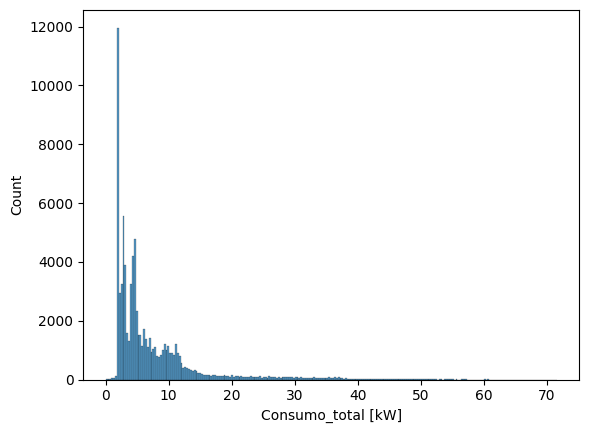

In [47]:
sns.histplot(df5["Consumo_total [kW]"])

Text(0.5, 0.98, '')

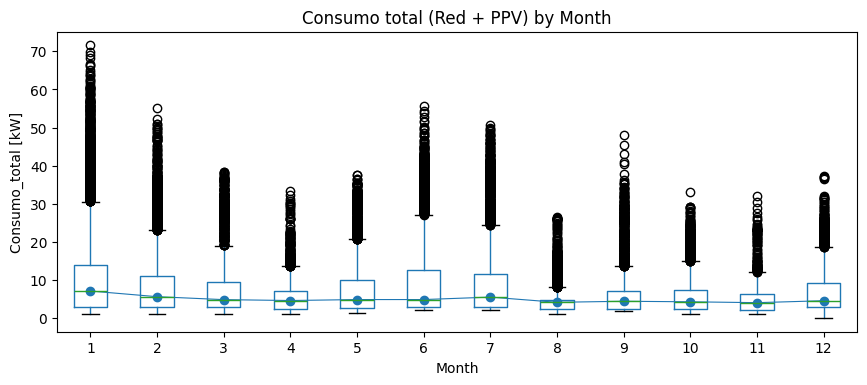

In [48]:
fig, ax = plt.subplots(figsize=(10, 4))
df5.boxplot(column='Consumo_total [kW]', by='Month', ax=ax)
df5.groupby('Month')['Consumo_total [kW]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Consumo_total [kW]')
ax.set_title("Consumo total (Red + PPV) by Month")
fig.suptitle('')

Text(0.5, 0.98, '')

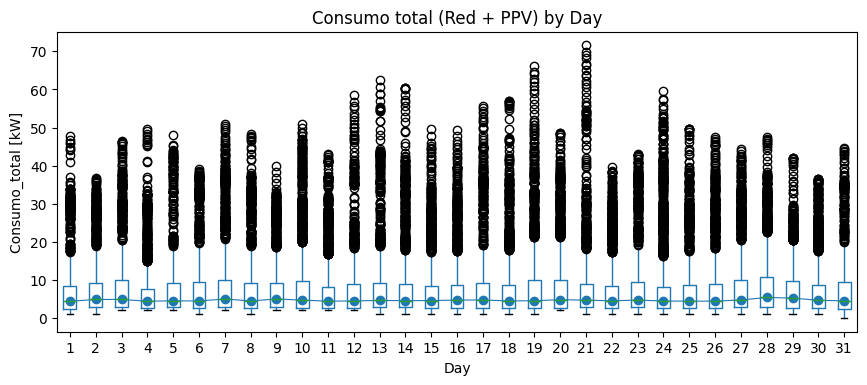

In [49]:
fig, ax = plt.subplots(figsize=(10, 4))
df5.boxplot(column='Consumo_total [kW]', by='Day', ax=ax)
df5.groupby('Day')['Consumo_total [kW]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Consumo_total [kW]')
ax.set_title("Consumo total (Red + PPV) by Day")
fig.suptitle('')

Text(0.5, 0.98, '')

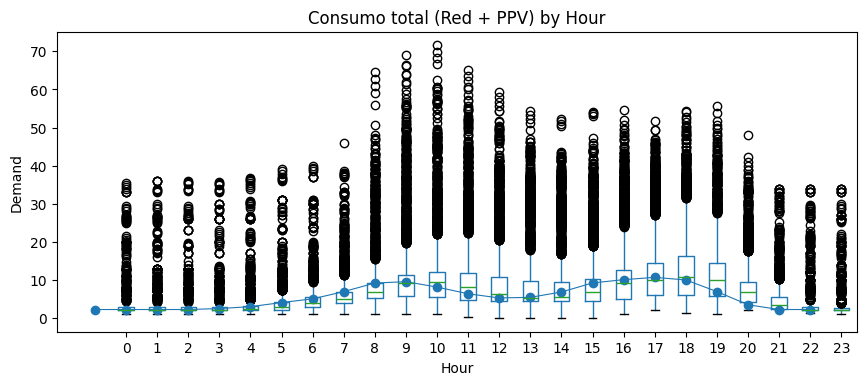

In [50]:
fig, ax = plt.subplots(figsize=(10, 4))
df5.boxplot(column='Consumo_total [kW]', by='Hour', ax=ax)
df5.groupby('Hour')['Consumo_total [kW]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Demand')
ax.set_title("Consumo total (Red + PPV) by Hour")
fig.suptitle('')

In [51]:
# # Weekly Demand Plot
# whole_df.set_index('Date', inplace=True)
# whole_df_1w = whole_df.resample('1W').mean()
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=whole_df_1w.index, y=whole_df_1w["Demand"], mode='lines'))
# fig.update_layout(
#     title = "Weekly Energy Demand",
#     xaxis_title = "Date",
#     yaxis_title = "Demand (MWh)",
#     width = 850,
#     height = 400,
#     margin=dict(l=20, r=20, t=35, b=20),
#     legend=dict(
#         orientation="h",
#         yanchor="top",
#         y=1,
#         xanchor="left",
#         x=0.001
#     )
# )
# fig.show()

#### Demand per Day and Season

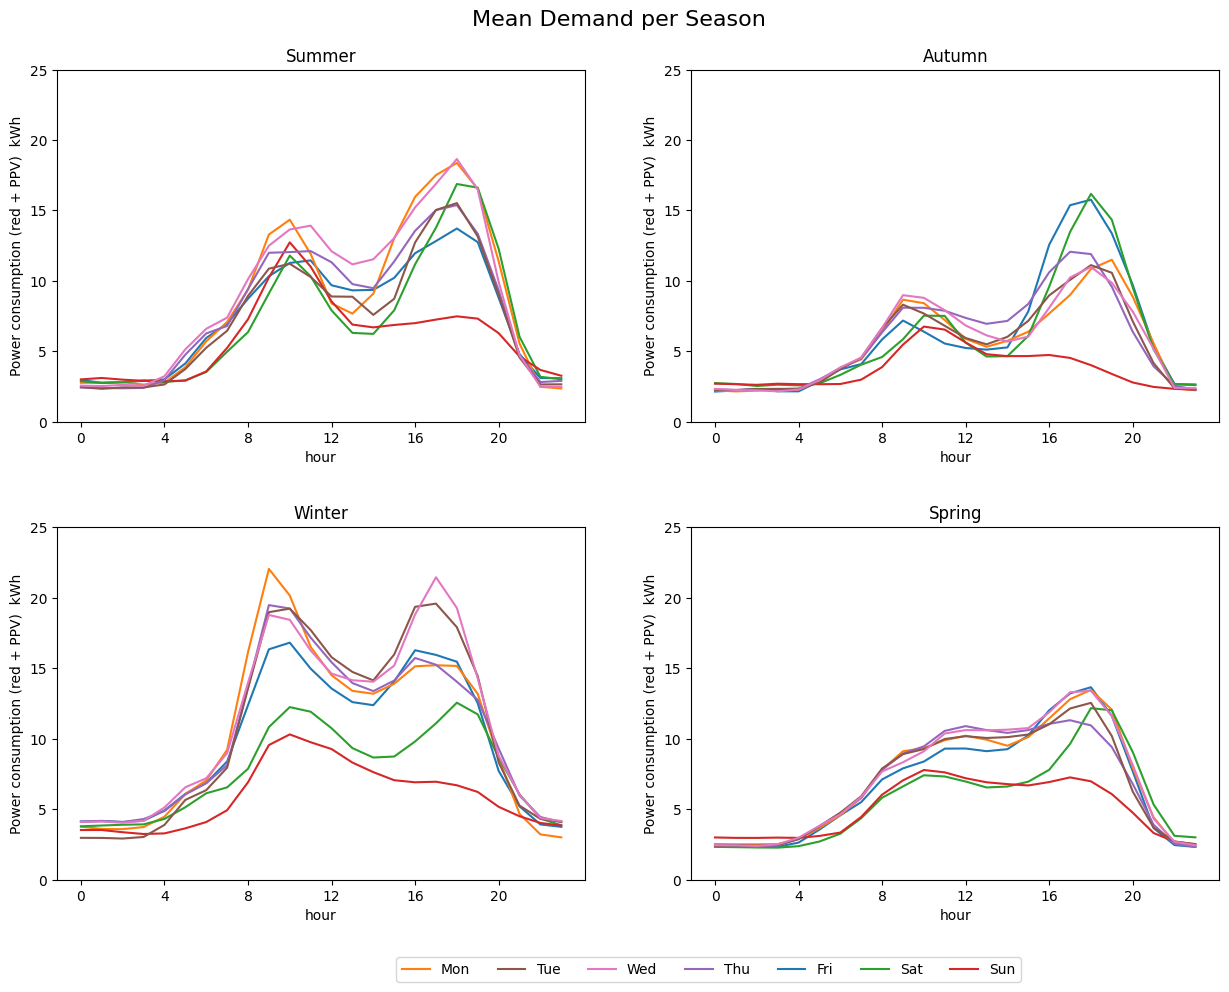

In [52]:
days_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df5["Day"] = df5["DayOfWeek"].map(days_mapping)
df5["Season"] = df5["Month"].apply(
    lambda x: (
        1 if x in [3, 4, 5] #Spring
        else 2 if x in [6, 7, 8] #Summer
        else 3 if x in [9, 10, 11] #Autumn
        else 0 #Winter
    )
)
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.3, top=0.92)
fig.suptitle("Mean Demand per Season", fontsize=16)

fig.set_figheight(10)
fig.set_figwidth(15)

ymin, ymax = 0, 25

#Season Summer
df5.loc[df5["Season"] == 2] \
    .groupby([df5.loc[df5["Season"] == 2]["Hour"], 'Day'])["Consumo_total [kW]"].mean().unstack().plot(
        ax=axes[0, 0], ylim=(ymin, ymax), title="Summer", legend=False
    )
df5.loc[df5["Season"] == 3] \
    .groupby([df5.loc[df5["Season"] == 3]["Hour"], 'Day'])["Consumo_total [kW]"].mean().unstack().plot(
        ax=axes[0, 1], ylim=(ymin, ymax), title="Autumn", legend=False
    )
df5.loc[df5["Season"] == 0] \
    .groupby([df5.loc[df5["Season"] == 0]["Hour"], 'Day'])["Consumo_total [kW]"].mean().unstack().plot(
        ax=axes[1, 0], ylim=(ymin, ymax), title="Winter", legend=False
    )
df5.loc[df5["Season"] == 1] \
    .groupby([df5.loc[df5["Season"] == 1]["Hour"], 'Day'])["Consumo_total [kW]"].mean().unstack().plot(
        ax=axes[1, 1], ylim=(ymin, ymax), title="Spring", legend=False
    )

for ax in axes.flat:
    ax.set(xlabel='hour', ylabel='Power consumption (red + PPV)  kWh')

for n in range(0, 2):
    axes[n, 0].set_xticks([0, 4, 8, 12, 16, 20])
    axes[n, 1].set_xticks([0, 4, 8, 12, 16, 20])
df5 = df5.drop("Day", axis=1)
# LEGEND
handles, labels = plt.gca().get_legend_handles_labels() # reorder Legend Labels
order = [1,5,6,4,0,2,3]      # specify order in Legend
axes[1,1].legend([handles[i] for i in order], [labels[i] for i in order], loc=1, ncol=7, 
                 bbox_to_anchor=(0.638,-0.2), frameon=True) # print and order LEGEND

Text(0.5, 0.98, '')

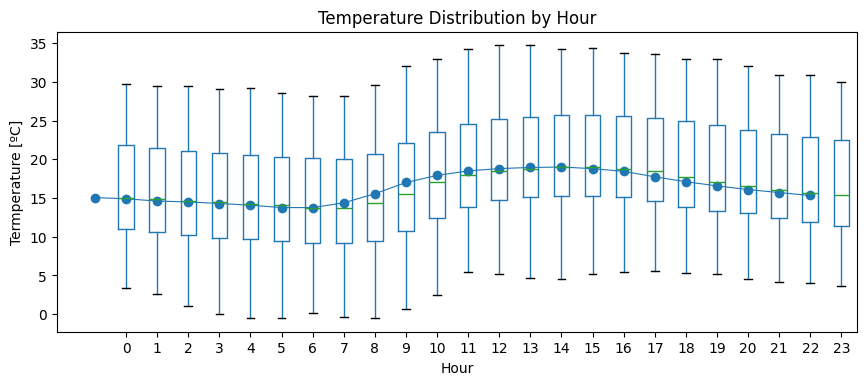

In [53]:
fig, ax = plt.subplots(figsize=(10, 4))
df5.boxplot(column='temp [C]', by='Hour', ax=ax)
df5.groupby('Hour')['temp [C]'].median().plot(style='o-', linewidth=.8, ax=ax)
ax.set_ylabel('Termperature [ºC]')
ax.set_title("Temperature Distribution by Hour")
fig.suptitle('')

Text(0.5, 0.98, '')

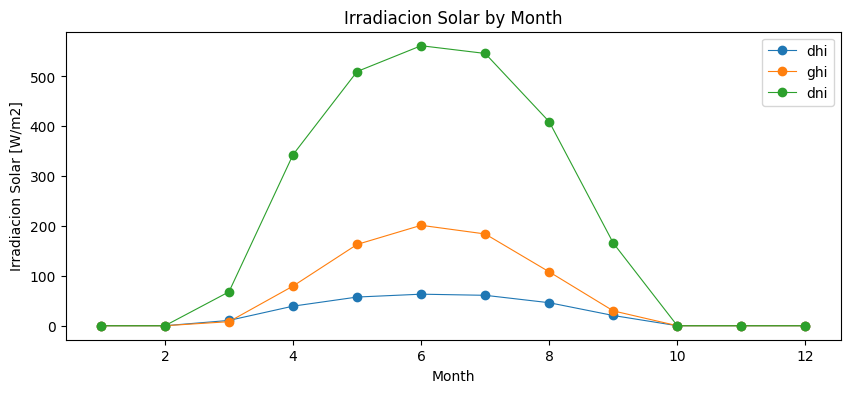

In [54]:
fig, ax = plt.subplots(figsize=(10, 4))

# df_PV.boxplot(column='dhi [W/m^2]', by='Month', ax=ax)
df_PV.groupby('Month')['dhi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='ghi [W/m^2]', by='Month', ax=ax)
df_PV.groupby('Month')['ghi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='dni [W/m^2]', by='Month', ax=ax)
df_PV.groupby('Month')['dni [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

ax.legend(['dhi', 'ghi', 'dni'])

# dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
# ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
# dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

ax.set_ylabel('Irradiacion Solar [W/m2]')
ax.set_title("Irradiacion Solar by Month")
fig.suptitle('')

Text(0.5, 0.98, '')

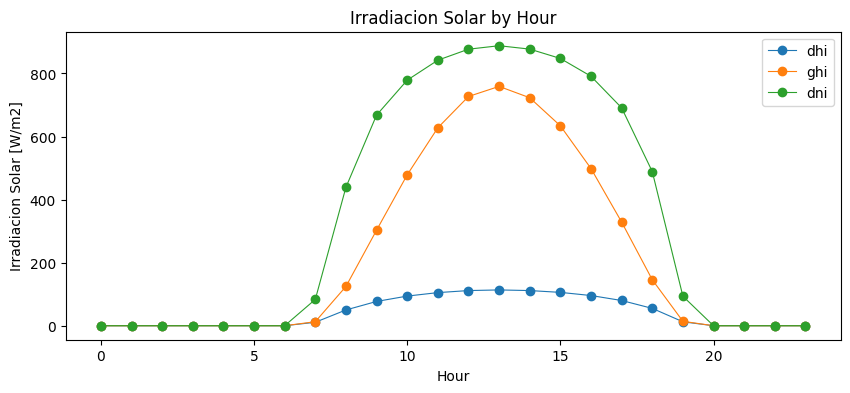

In [55]:
fig, ax = plt.subplots(figsize=(10, 4))

# df_PV.boxplot(column='dhi [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['dhi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='ghi [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['ghi [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

# df_PV.boxplot(column='dni [W/m^2]', by='Hour', ax=ax)
df_PV.groupby('Hour')['dni [W/m^2]'].median().plot(style='o-', linewidth=.8, ax=ax)

ax.legend(['dhi', 'ghi', 'dni'])

# dhi                      Irradiancia solar difusa en el plano horizontal    W/m2 [Clear Sky] 
# ghi                      Irradiancia solar global en el plano horizontal    W/m2 [Clear Sky] 
# dni                      Irradiancia solar directa normal                   W/m2 [Clear Sky] 

ax.set_ylabel('Irradiacion Solar [W/m2]')
ax.set_title("Irradiacion Solar by Hour")
fig.suptitle('')

## AutoCorrelation Plots

In [56]:
df5.head()

Date  Consumo_red [kW]  pres [mb]  slp [mb]  wind_dir [m/s]  \
0 2022-01-01 00:00:00               6.0     1027.0    1028.0           360.0   
1 2022-01-01 00:15:00               6.0     1027.0    1028.0           357.5   
2 2022-01-01 00:30:00               6.0     1027.0    1028.0           355.0   
3 2022-01-01 00:45:00               6.0     1027.0    1028.0           352.5   
4 2022-01-01 01:00:00               6.0     1027.0    1028.0           350.0   

   wind_gust_spd [m/s]  wind_spd [m/s]  temp [C]  app_temp [C]  rh [%]  ...  \
0                  4.0             1.0      10.7          10.7    92.0  ...   
1                  4.1             1.4      10.7          10.7    91.0  ...   
2                  4.2             1.8      10.7          10.7    90.0  ...   
3                  4.3             2.2      10.7          10.7    89.0  ...   
4                  4.4             2.6      10.7          10.7    88.0  ...   

   Hour_sin  DayOfWeek_sin  DayOfWeek_cos  Month_sin  Month_cos  \
0   -0.2588        -0.4339         -0.901        0.0        1.0   
1   -0.2588        -0.4339         -0.901        0.0        1.0   
2   -0.2588        -0.4339         -0.901        0.0        1.0   
3   -0.2588        -0.4339         -0.901        0.0        1.0   
4    0.0000        -0.4339         -0.901        0.0        1.0   

   DayOfYear_sin  DayOfYear_cos  Consumo_total [kW]_-24h  isHoliday  Season  
0            0.0            1.0                      0.0       True       0  
1            0.0            1.0                      0.0       True       0  
2            0.0            1.0                      0.0       True       0  
3            0.0            1.0                      0.0       True       0  
4            0.0            1.0                      0.0       True       0  

[5 rows x 46 columns]

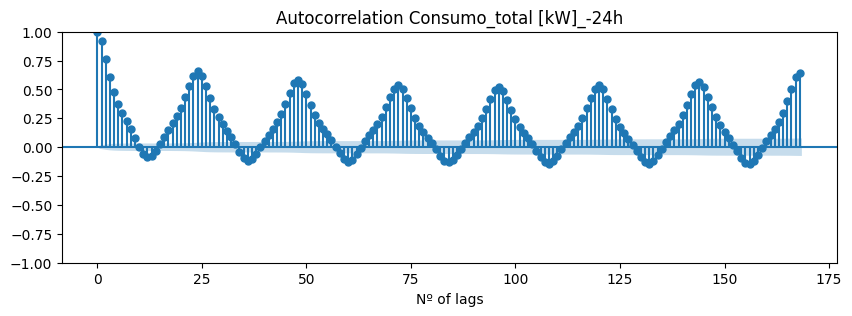

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
#Gráfico de autocorrelación 1
dfAutocorr = df5.copy()
dfAutocorr.set_index("Date", inplace=True)

dfAutocorr = dfAutocorr.resample('1h').mean()
fig, ax = plt.subplots(figsize=(10, 3))
plt.xlabel("Nº of lags")

plot_acf(dfAutocorr["Consumo_total [kW]_-24h"], ax=ax, lags=24*7)
plt.title("Autocorrelation Consumo_total [kW]_-24h")
plt.show()

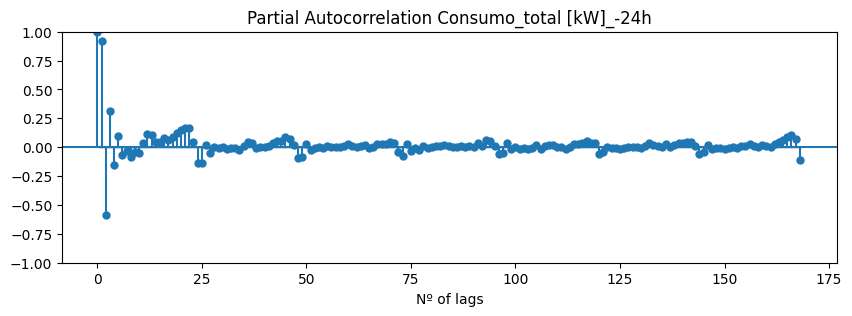

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf
#Gráfico de autocorrelación parcial
fig, ax = plt.subplots(figsize=(10, 3))
plt.xlabel("Nº of lags")
plot_pacf(dfAutocorr["Consumo_total [kW]_-24h"], ax=ax, lags=24*7)
plt.title("Partial Autocorrelation Consumo_total [kW]_-24h")
plt.show()

## Correlation Matrix

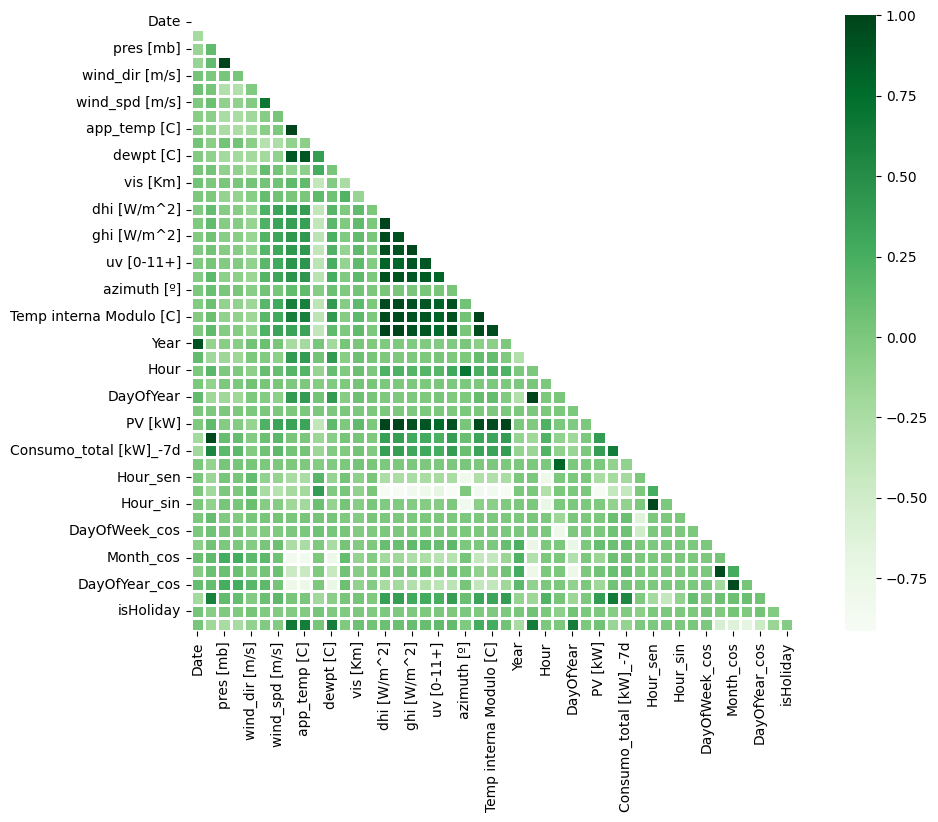

In [59]:
# Calcula la matriz de correlación completa
correlation_matrix = df5.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

# Imprime la matriz de correlación del cuadrante inferior
#plotting the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, square=True, cmap='Greens', linewidths=2, linecolor='white');

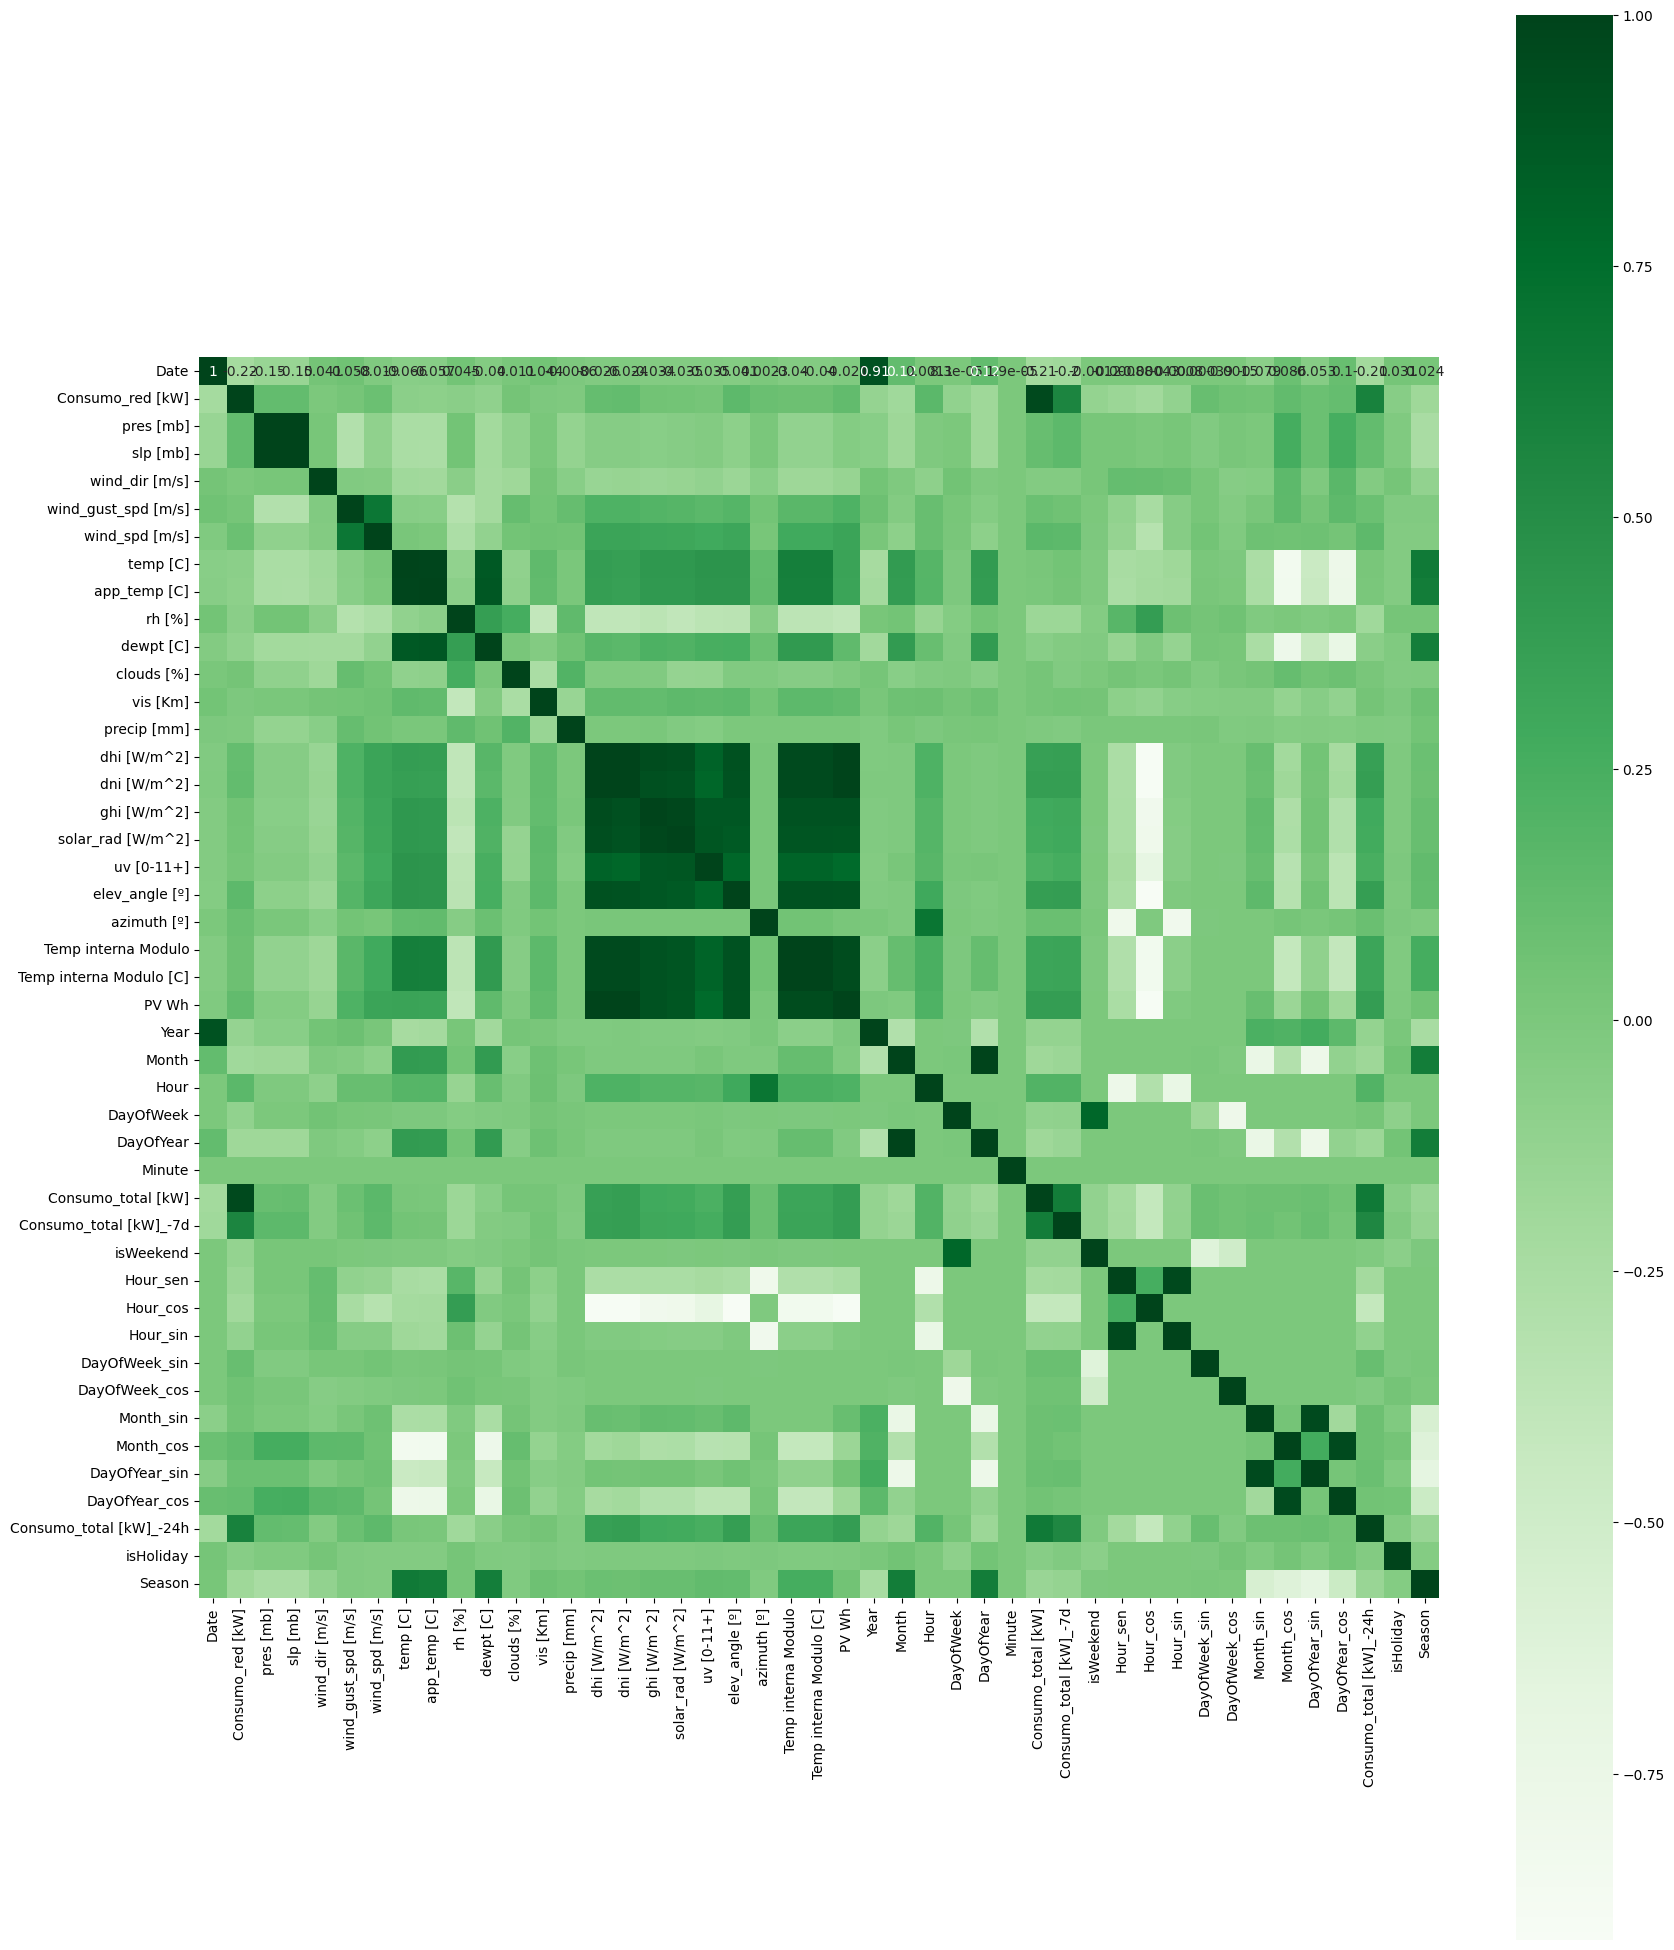

In [60]:
# Calcula la matriz de correlación completa
df6 = df5.copy()
df6.drop(columns=["PV [kW]"], inplace=True)

correlation_matrix = df6.corr()



# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

# Imprime la matriz de correlación del cuadrante inferior
#plotting the heatmap for correlation
plt.figure(figsize=(20, 25))
sns.heatmap(correlation_matrix, square=True, cmap='Greens', annot=True);

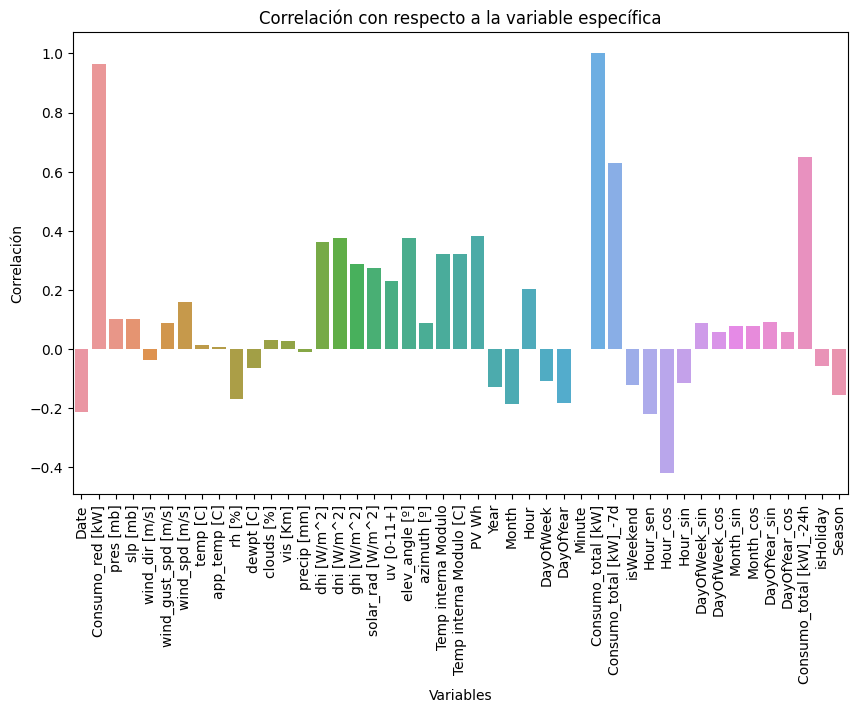

In [61]:
# Crear un gráfico de barras de la correlación respecto a la variable específica
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Consumo_total [kW]'])
plt.title('Correlación con respecto a la variable específica')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.show()

In [62]:
# Guardar el DataFrame como CSV
nombre_archivo = "LaMonserratina_2022_2023_2024.csv"
ruta_completa = os.path.join(ruta_data, nombre_archivo)
df6.to_csv(ruta_completa)